## 신경망과 딥러닝
# 케라스 MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

### MNIST 불러오기
- C:\Users\\[사용자아이디]\\.keras\datasets\mnist.npz 에 저장됨

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train.max(), X_train.min()

(255, 0)

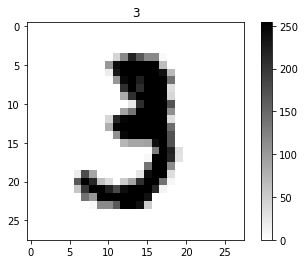

In [8]:
plt.title(y_train[10])
plt.imshow(X_train[10], cmap='gray_r')
plt.colorbar()

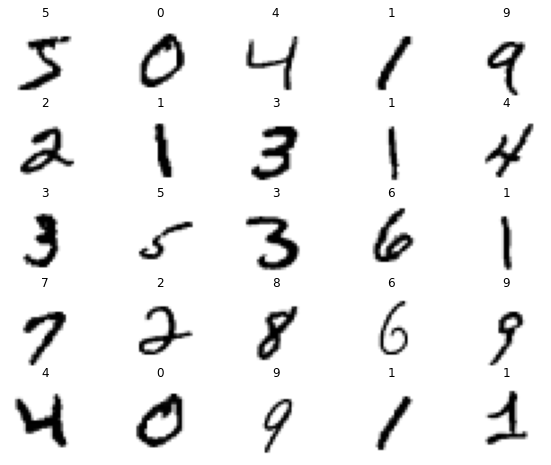

In [11]:
plt.figure(figsize=[10,8])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='gray_r')
    plt.axis('off')

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 데이터 전처리
- 이미지를 1차원으로 풀고, 최대값이 1이 되게 실수값으로 바꾼다
- 목표값을 원핫인코딩으로 바꾼다

In [10]:
X_train = X_train.reshape(-1,28*28)/255.
X_test = X_test.reshape(-1,28*28)/255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [11]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### MNIST 신경망 구조

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
> 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

<img src='https://mmlind.github.io/images/1lnn.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 타겟 클래스가 10개이므로, 가중치와 절편이 그 만큼 늘어난다.
- 클래스값 0 => w1_1, w2_1, ..., w784_1, b1
- 클래스값 1 -> w1_2, w2_2, ..., w784_2, b2
- 가중치갯수 = 784\*10, 절편갯수 = 10

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

### 비용함수
- 위와 같은 결과를 얻었을 때, 손실값을 어떻게 계산할까?
- mse = (0.003126 - 0)^2 + ... + (0.682134 - 1)^2 + ...
- 위와 같이 mse 를 적용할 수 있다.
- 하지만, 이런 멀티 클래스의 경우에는 다른 손실값을 적용하는 것이 일반적이다.
- 위 그림은 숫자 6을 판별한 것이다. 그러므로 결과값은 6 위치만 값이 1이다.
> cross\_entropy\_i = -log(0.682134), 입력 이미지 1개에 대한 손실값
- 모든 숫자 이미지에 대한 크로스엔트로피를 평균한 것이 최종값이다.
> $ cross\_entropy = {1 \over N} \sum_{i=0}^{N-1} {-log(cross\_entropy\_i)} $

### 활성화함수 (소프트맥스)
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

- 실제로는 위와 같이 마지막 출력값을 내기 전에 softmax 라는 함수를 적용하여 출력값을 바꾸어 준다.

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

- 출력값이 [2,1,0.1] 일때, 각각에 exponential 지수를 적용한 값의 비율을 구한 것이 softmax 이다.
- softmax 를 적용하면 최종 출력값을 모두 더하면 1이 된다. (즉 확률 개념이 된다.)

<img src='mnist_nn.jpg' />
(출처: http://users.jyu.fi/~olkhriye/ties4911/lectures/Lecture03.pdf )<br>
<img src='https://image.slidesharecdn.com/tensorflowppt-160408142819/95/tensorflow-5-638.jpg?cb=1460125744' />
(출처: https://www.slideshare.net/jirimaterna/tensorflow-60661959 )

### 단층 신경망 (로지스틱 회귀)
- 입력층 : 이미지
- 중간층 : 없음
- 출력층 : 뉴런 10개
- 출력층 활성화함수 : 소프트맥스
- 비용함수 : 크로스엔트로피
> $$ cross\_entropy = - \frac{1}{N} \sum_i y_i \cdot log(\hat{y}_i) $$

In [24]:
-np.log(0)

<ipython-input-24-bffa671ebd70>:1: RuntimeWarning: divide by zero encountered in log
  -np.log(0)


inf

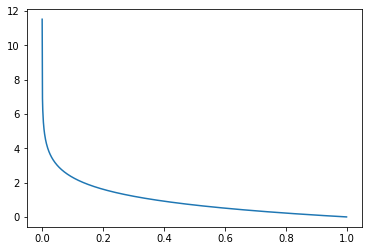

In [23]:
x = np.arange(0.00001, 1, 0.001)
y = -np.log(x)
plt.plot(x, y)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [14]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1,28*28)/255.
X_test = X_test.reshape(-1,28*28)/255.
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [15]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 21s 9ms/step - loss: 0.6664 - acc: 0.8259
Epoch 2/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3008 - acc: 0.9165
Epoch 3/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2911 - acc: 0.9210
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2800 - acc: 0.9239
Epoch 5/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2752 - acc: 0.9248
Epoch 6/100
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2810 - acc: 0.9262
Epoch 7/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2785 - acc: 0.9288
Epoch 8/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2798 - acc: 0.9273
Epoch 9/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2755 - acc: 0.9284
Epoch 10/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2772 - acc: 0.9298
Epoch 11/

1875/1875 [==============================] - 15s 8ms/step - loss: 0.3063 - acc: 0.9335
Epoch 78/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2832 - acc: 0.9364
Epoch 79/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2987 - acc: 0.9353
Epoch 80/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2999 - acc: 0.9360
Epoch 81/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2940 - acc: 0.9364
Epoch 82/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2937 - acc: 0.9353
Epoch 83/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2845 - acc: 0.9367
Epoch 84/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2998 - acc: 0.9349
Epoch 85/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3015 - acc: 0.9354
Epoch 86/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2929 - acc: 0.9373
Epoch 87/100


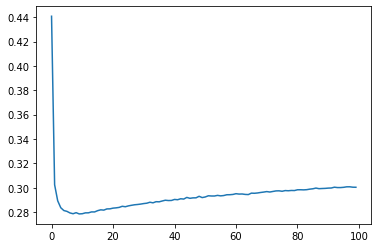

In [15]:
plt.plot(model.history.history['loss'])

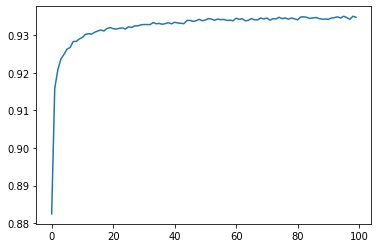

In [16]:
plt.plot(model.history.history['acc'])

In [17]:
pred_y = model.predict(X_test)
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.9257

In [17]:
pred_y = model.predict(X_train)
pred_y

array([[3.1314560e-08, 8.2664993e-11, 3.9346583e-06, ..., 3.1973562e-12,
        9.0305264e-08, 2.6300649e-11],
       [9.9999988e-01, 5.4227182e-23, 3.4983378e-09, ..., 2.4182842e-19,
        2.2468718e-09, 5.4525920e-14],
       [2.8812655e-10, 2.3423421e-05, 2.6709193e-05, ..., 2.4184008e-06,
        5.1872302e-11, 1.1229498e-07],
       ...,
       [6.0552319e-09, 1.0753248e-05, 1.2677248e-11, ..., 5.3263619e-17,
        7.9137867e-04, 2.7308190e-15],
       [6.1700604e-08, 4.4662178e-17, 5.8375075e-08, ..., 4.2252434e-08,
        2.0822741e-11, 5.9302885e-10],
       [5.1805645e-04, 3.8908638e-14, 5.4635976e-09, ..., 2.6285036e-08,
        9.6575248e-01, 6.2809448e-07]], dtype=float32)

In [18]:
(pred_y.argmax(axis=1)==y_train.argmax(axis=1)).mean()

0.9350333333333334

In [19]:
ws = model.get_weights()
ws[0].shape, ws[1].shape

((784, 10), (10,))

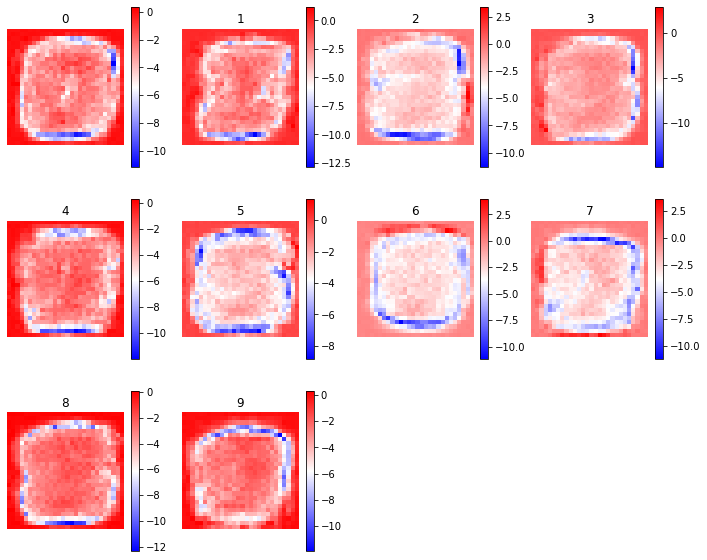

In [20]:
plt.figure(figsize=[12,10])

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(ws[0][:,i].reshape(28,28), cmap='bwr')
    plt.axis('off')
    plt.title(i)
    plt.colorbar()

### 중간층 추가

In [21]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 20s 44ms/step - loss: 0.5355 - acc: 0.8407 - val_loss: 0.1687 - val_acc: 0.9492
Epoch 2/10
375/375 [==============================] - 14s 37ms/step - loss: 0.1284 - acc: 0.9605 - val_loss: 0.1196 - val_acc: 0.9648
Epoch 3/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0802 - acc: 0.9753 - val_loss: 0.1076 - val_acc: 0.9691
Epoch 4/10
375/375 [==============================] - 14s 36ms/step - loss: 0.0584 - acc: 0.9816 - val_loss: 0.0872 - val_acc: 0.9747
Epoch 5/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0450 - acc: 0.9855 - val_loss: 0.1095 - val_acc: 0.9712
Epoch 6/10
375/375 [==============================] - 14s 37ms/step - loss: 0.0342 - acc: 0.9893 - val_loss: 0.1059 - val_acc: 0.9749- lo
Epoch 7/10
375/375 [==============================] - 13s 36ms/step - loss: 0.0294 - acc: 0.9901 - val_loss: 0.1023 - val_acc: 0.9763
Epoch 8/10
375/375 [==============================] - 13s 

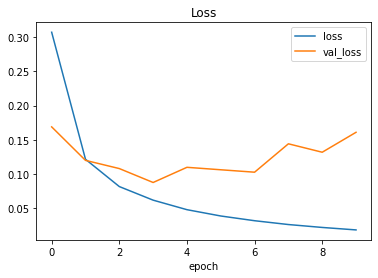

In [24]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

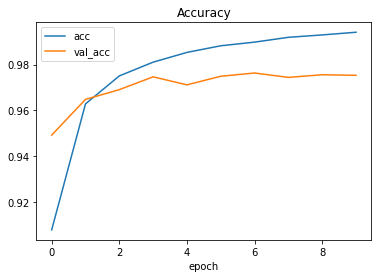

In [25]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

- 미니배치 : 훈련데이터를 일정한 갯수만큼 나누어 훈련시키고 가중치를 업데이트한다 (batch_size=128)
- 검증데이터 : 훈련데이터 중 일부를 검증을 위해 따로 떼어놓고 loss 와 acc 를 별도로 계산한다
    - validation_split
    - validation_data

In [30]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a given number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has 

In [26]:
pred_y_train = model.predict(X_train)
pred_y_train.shape

(60000, 10)

In [27]:
(pred_y_train*y_train).sum()/len(y_train) # score of train

0.9886217265081461

In [28]:
pred_y_test = model.predict(X_test)
pred_y_test.shape

(10000, 10)

In [29]:
(pred_y_test*y_test).sum()/len(y_test) # score of test

0.9748315004798087

> **연습문제**
> - 오류가 발생한 이미지를 출력하시오

### 모델 저장

In [36]:
model.save('mnist_model_01.h5') # creates a HDF5 file

In [39]:
from keras.models import load_model

model2 = load_model('mnist_model_01.h5')

In [42]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.predict(X_test)

array([[1.7897082e-18, 1.2604499e-14, 1.4408841e-12, ..., 1.0000000e+00,
        1.5553001e-17, 8.6794649e-10],
       [2.2513420e-24, 1.3519225e-10, 1.0000000e+00, ..., 3.6946021e-16,
        4.7015980e-20, 1.3197994e-25],
       [1.9272220e-10, 9.9997580e-01, 1.7852156e-07, ..., 2.1316106e-05,
        2.4139629e-08, 4.9846496e-09],
       ...,
       [1.1987138e-27, 4.3853409e-23, 5.8669306e-25, ..., 1.4196603e-16,
        3.5619537e-23, 8.0281834e-15],
       [8.6556915e-25, 2.5036305e-26, 1.9347526e-25, ..., 1.2481194e-22,
        1.9484564e-16, 3.3102383e-25],
       [2.1923046e-24, 1.4936362e-32, 1.3257251e-30, ..., 4.9728456e-38,
        1.6158497e-25, 1.5502201e-29]], dtype=float32)

- 가중치 저장 및 로딩

In [ ]:
model.save_weights("mnist_weights_01.h5")
model2.load_weights("mnist_weights_01.h5")

### Flatten
- 출력값을 1차원으로 풀어준다

In [31]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
X_train = X_train/255
X_test = X_test/255

In [33]:
from tensorflow.keras.layers import Flatten

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, np.eye(10)[y_train], epochs=2, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 14s 296us/step - loss: 0.3087 - acc: 0.9046 - val_loss: 0.1806 - val_acc: 0.9437
Epoch 2/2
48000/48000 [==============================] - 13s 270us/step - loss: 0.1212 - acc: 0.9628 - val_loss: 0.1149 - val_acc: 0.9656


In [53]:
pred_y_train = model.predict(X_train)

In [54]:
(pred_y_train.argmax(axis=1)==y_train).mean()

0.9737

### Dropout
- Dropout 은 고의적으로 중간 단계의 출력값 들을 누락시키는 것이다.
- 이렇게 하면 모델이 좀 더 예외상황에 견딜 수 있게 하여, 새로운 데이터에 대한 예측 능력을 키울 수 있다고 알려져 있다.
- 사진의 일부분을 가리거나 시야가 흐릿해 지는 등의 효과와 비슷하다.
- 여러가지 예외사항에 대처가 가능한 강건한 모델을 만들 수 있다.
- 훈련시에는 출력값을 누락시키지만, 검증시에는 모든 출력값을 사용한다. (단 누락비율에 맞게 출력값을 줄여준다)

In [36]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [37]:
X_train = X_train/255
X_test = X_test/255

In [38]:
from tensorflow.keras.layers import Dropout

In [45]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, np.eye(10)[y_train], epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 18s 39ms/step - loss: 0.9689 - acc: 0.6767 - val_loss: 0.2015 - val_acc: 0.9388
Epoch 2/20
375/375 [==============================] - 14s 36ms/step - loss: 0.3418 - acc: 0.8993 - val_loss: 0.1567 - val_acc: 0.9544
Epoch 3/20
375/375 [==============================] - 14s 37ms/step - loss: 0.2631 - acc: 0.9233 - val_loss: 0.1450 - val_acc: 0.9591
Epoch 4/20
375/375 [==============================] - 13s 35ms/step - loss: 0.2345 - acc: 0.9333 - val_loss: 0.1297 - val_acc: 0.9653
Epoch 5/20
375/375 [==============================] - 13s 35ms/step - loss: 0.2093 - acc: 0.9401 - val_loss: 0.1240 - val_acc: 0.9672
Epoch 6/20
375/375 [==============================] - 13s 36ms/step - loss: 0.2037 - acc: 0.9429 - val_loss: 0.1167 - val_acc: 0.9677
Epoch 7/20
375/375 [==============================] - 13s 35ms/step - loss: 0.1957 - acc: 0.9451 - val_loss: 0.1137 - val_acc: 0.9703
Epoch 8/20
375/375 [==============================] - 14s 38ms

In [48]:
pred_y_train = model.predict(X_train)
(pred_y_train.argmax(axis=1)==y_train).mean()

0.9848833333333333

In [49]:
pred_y_test = model.predict(X_test)
(pred_y_test.argmax(axis=1)==y_test).mean()

0.9722

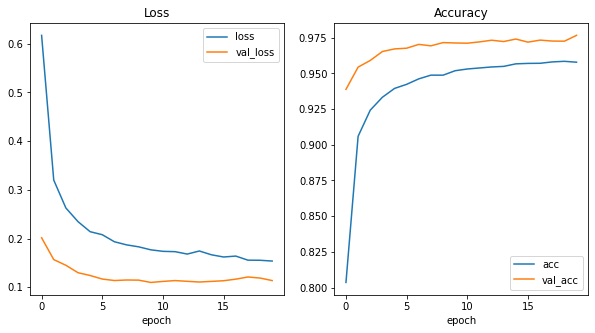

In [50]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

- 훈련데이터는 드랍아웃을 적용했기 때문에 드랍아웃을 적용하지 않은 검증데이터보다 손실이 크다